In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import GridSearchCV

In [4]:
_train_df = pd.read_csv("train_dataset/2017.csv")
_test_df = pd.read_csv("test_dataset/2018.csv")
_train_df

,Unnamed: 0,None,Unnamed: 0.1,accepted,authors,count,female,gender,len_authors,len_title,male,num_authors,num_words,prob,title
0,0,0,0,1,"Jonathon Cai, Richard Shin, Dawn Song",145.0,0,male,37,64,1,3,7,1.00,Making Neural Programming Architectures Genera...
1,1,0,1,1,"Johannes Ballé, Valero Laparra, Eero P. Simonc...",198.0,0,male,50,38,1,3,4,1.00,End-to-end Optimized Image Compression
2,2,0,2,1,"Sachin Ravi, Hugo Larochelle",201.0,0,male,28,45,1,2,7,1.00,Optimization as a Model for Few-Shot Learning
3,3,0,3,1,"Antoine Bordes, Y-Lan Boureau, Jason Weston",411.0,0,male,43,40,1,3,4,1.00,Learning End-to-End Goal-Oriented Dialog
4,4,0,4,1,"Martin Arjovsky, Leon Bottou",3568.0,0,male,28,71,1,2,8,1.00,Towards Principled Methods for Training Genera...
5,5,0,5,1,"Max Jaderberg, Volodymyr Mnih, Wojciech Marian...",1140.0,0,male,115,56,1,7,6,0.98,Reinforcement Learning with Unsupervised Auxil...
6,6,0,6,1,"Angeliki Lazaridou, Alexander Peysakhovich, Ma...",11.0,1,female,56,63,0,3,8,1.00,Multi-Agent Cooperation and the Emergence of (...
7,7,1,7,1,"Chiyuan Zhang, Samy Bengio, Moritz Hardt, Benj...",0.0,0,None,71,62,0,5,6,0.00,Understanding deep learning requires rethinkin...
8,8,0,8,1,"Barret Zoph, Quoc Le",3.0,0,male,20,54,1,2,6,1.00,Neural Architecture Search with Reinforcement ...
9,9,1,9,1,"Shixiang Gu, Timothy Lillicrap, Zoubin Ghahram...",0.0,0,None,83,66,0,5,8,0.00,Q-Prop: Sample-Efficient Policy Gradient with ...


In [5]:
train_df = _train_df.drop(['Unnamed: 0', "Unnamed: 0.1", "authors", "gender", "title"], axis=1)
train_df.head()

,None,accepted,count,female,len_authors,len_title,male,num_authors,num_words,prob
0,0,1,145.0,0,37,64,1,3,7,1.0
1,0,1,198.0,0,50,38,1,3,4,1.0
2,0,1,201.0,0,28,45,1,2,7,1.0
3,0,1,411.0,0,43,40,1,3,4,1.0
4,0,1,3568.0,0,28,71,1,2,8,1.0


In [6]:
test_df = _test_df.drop(['Unnamed: 0', "Unnamed: 0.1", "authors", "gender", "title"], axis=1)
test_df = test_df[train_df.columns.tolist()]
test_df.head()

,None,accepted,count,female,len_authors,len_title,male,num_authors,num_words,prob
0,0,1,2.0,0,43,37,1,3,7,1.00
1,0,1,30.0,0,30,65,1,2,9,1.00
2,0,1,14.0,1,87,70,0,6,8,0.57
3,0,1,4.0,1,42,60,0,4,9,0.75
4,0,1,11.0,1,66,90,0,4,12,1.00


In [7]:
test_df.dtypes

None             int64
accepted         int64
count          float64
female           int64
len_authors      int64
len_title        int64
male             int64
num_authors      int64
num_words        int64
prob           float64
dtype: object

In [8]:
train_df.dtypes

None             int64
accepted         int64
count          float64
female           int64
len_authors      int64
len_title        int64
male             int64
num_authors      int64
num_words        int64
prob           float64
dtype: object

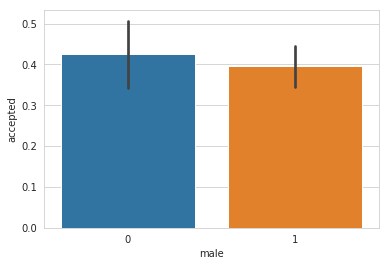

In [9]:
sns.barplot(x="male", y="accepted", data=train_df)
plt.show()

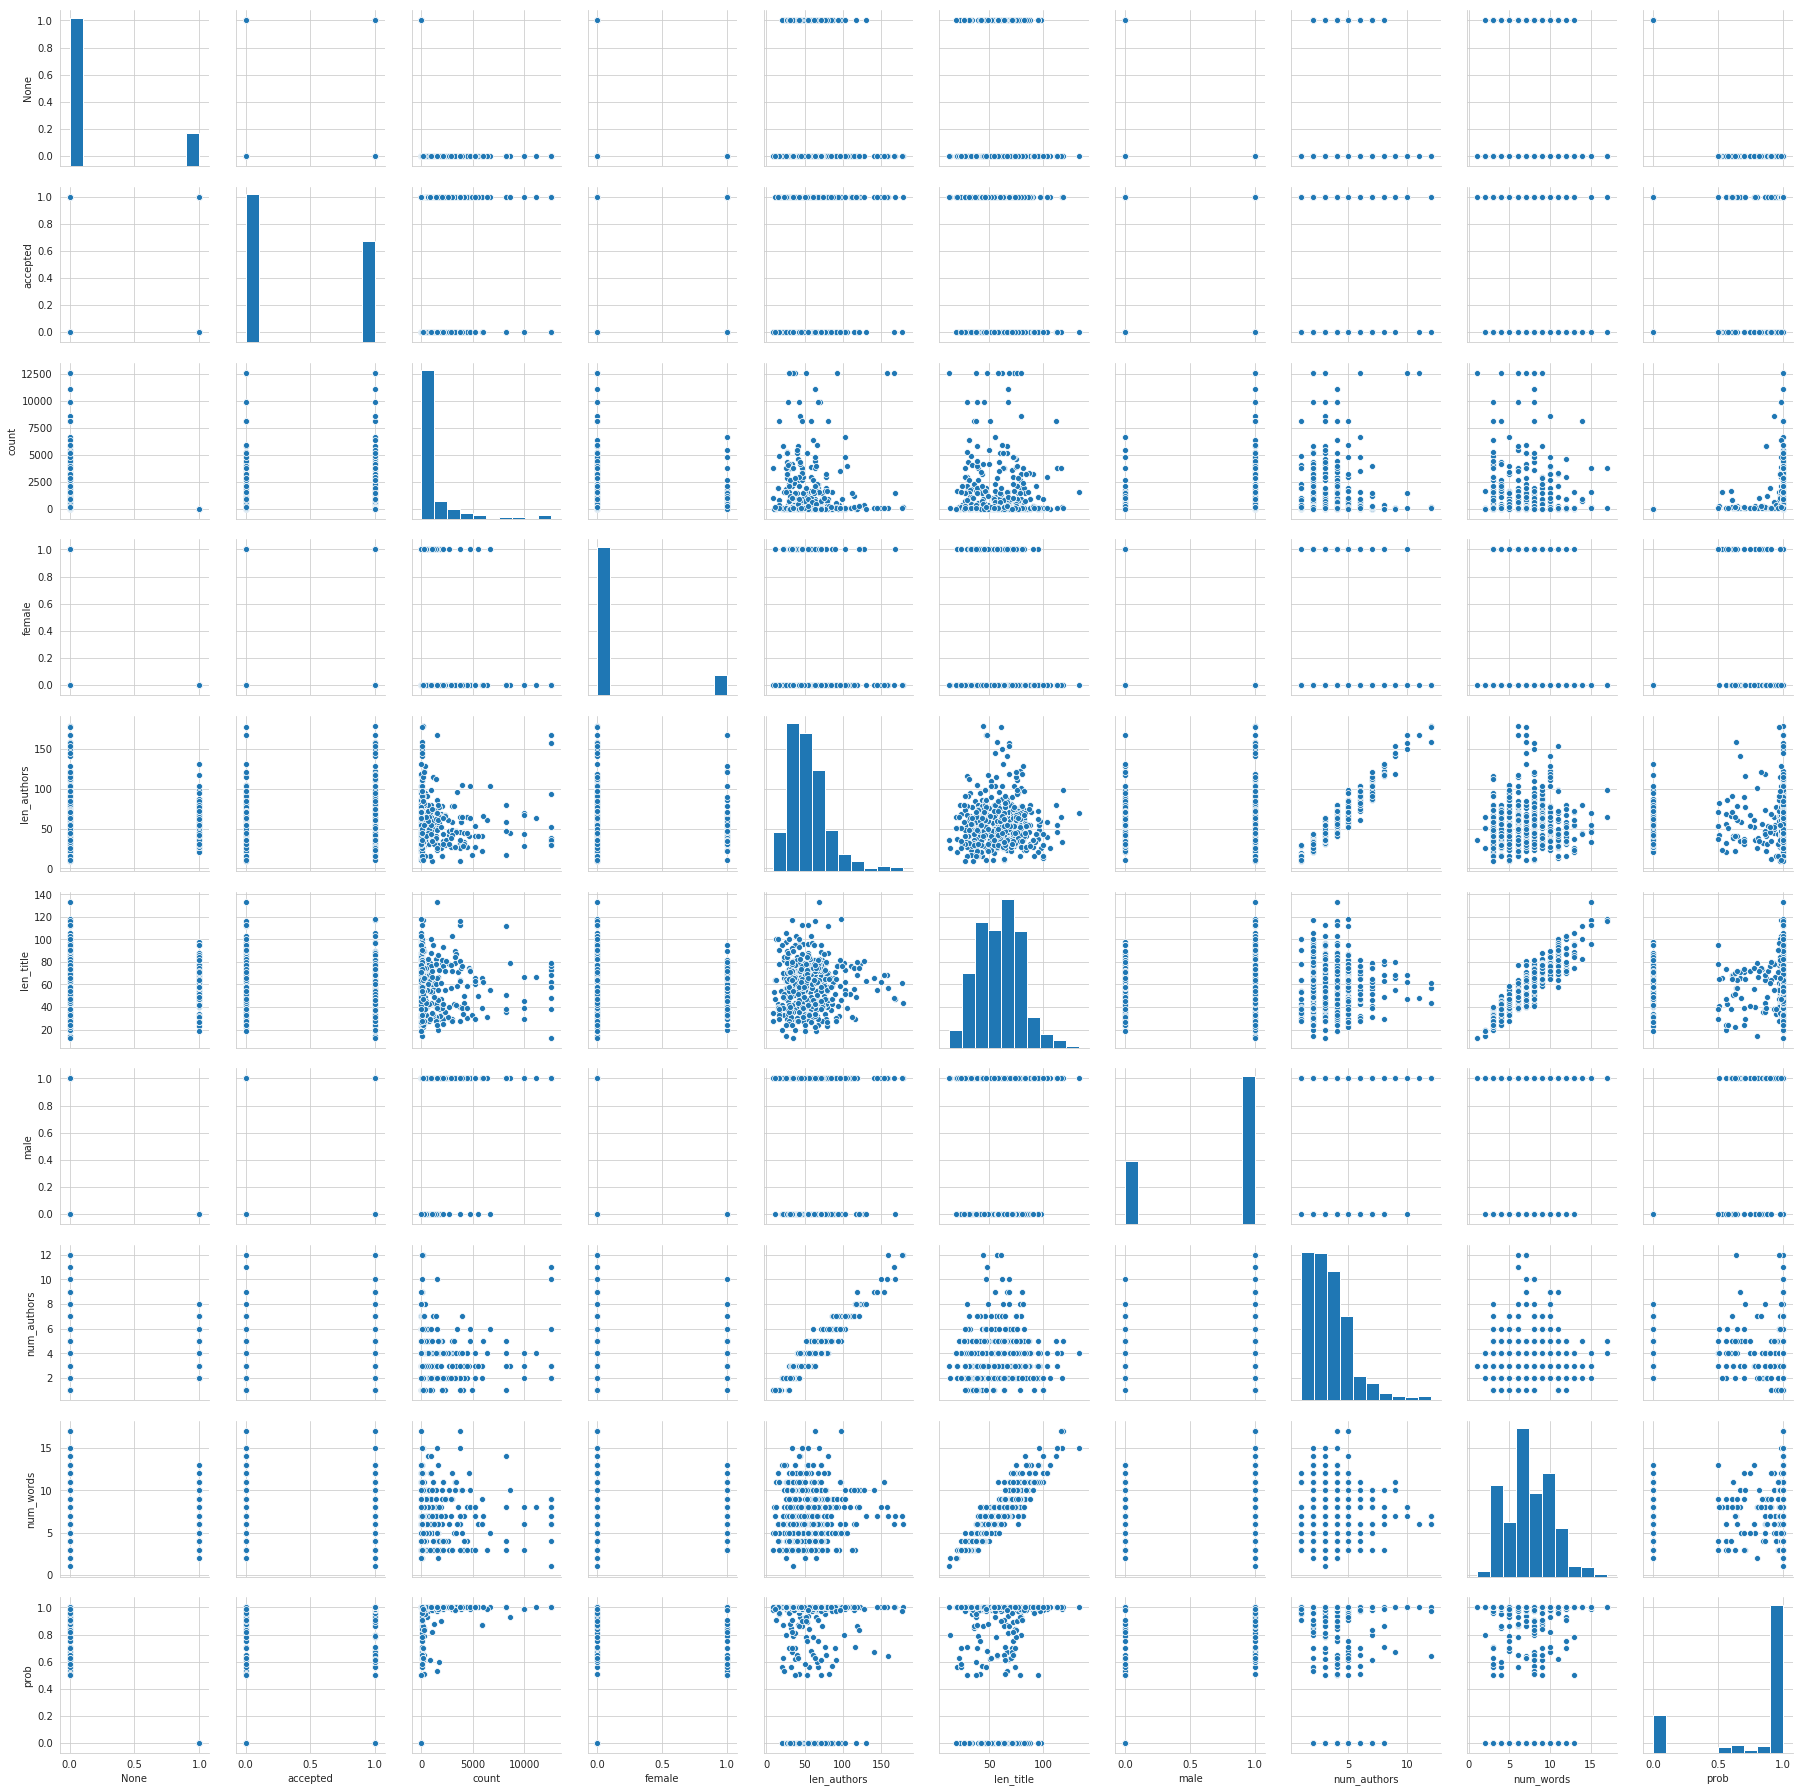

In [10]:
sns.pairplot(train_df)

In [11]:
train_df.head()

,None,accepted,count,female,len_authors,len_title,male,num_authors,num_words,prob
0,0,1,145.0,0,37,64,1,3,7,1.0
1,0,1,198.0,0,50,38,1,3,4,1.0
2,0,1,201.0,0,28,45,1,2,7,1.0
3,0,1,411.0,0,43,40,1,3,4,1.0
4,0,1,3568.0,0,28,71,1,2,8,1.0


In [12]:
scale_col = ['count', 'len_authors', 'len_title', 'num_authors', 'num_words']

def scaling_column(df, column):
    df[column] = (df[column] - df[column].min()) / df[column].max()
    return df

In [13]:
for col in scale_col:
    train_df = scaling_column(train_df, col)
train_df.head()

,None,accepted,count,female,len_authors,len_title,male,num_authors,num_words,prob
0,0,1,0.011514,0,0.156425,0.383459,1,0.166667,0.352941,1.0
1,0,1,0.015723,0,0.229050,0.187970,1,0.166667,0.176471,1.0
2,0,1,0.015961,0,0.106145,0.240602,1,0.083333,0.352941,1.0
3,0,1,0.032637,0,0.189944,0.203008,1,0.166667,0.176471,1.0
4,0,1,0.283332,0,0.106145,0.436090,1,0.083333,0.411765,1.0


In [35]:
accepted_mean = train_df[train_df['accepted'] == 1]['len_title'].mean()
rejected_mean = train_df[train_df['accepted'] == 0]['len_title'].mean()
accepted_mean, rejected_mean

(0.32676387939545837, 0.360023770767124)

In [ ]:
train_df.

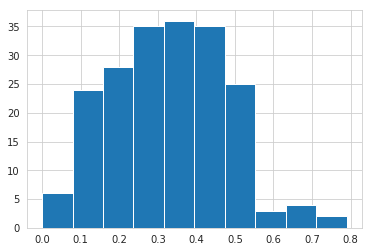

In [40]:
train_df[train_df['accepted'] ==1]['len_title'].hist()

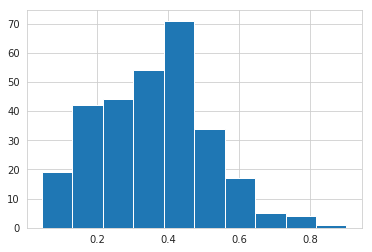

In [41]:
train_df[train_df['accepted'] ==0]['len_title'].hist()

In [14]:
X_train = train_df.drop(labels=['accepted'], axis=1)
Y_train = train_df['accepted']
X_test = test_df.drop(labels=['accepted'], axis=1)
Y_test = test_df['accepted']

In [15]:
print("done")

done


In [16]:
svc_clf = SVC() 

In [17]:
parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_train, Y_train)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear'], 'probability': [True, False], 'verbose': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [18]:
svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_train, Y_train)
pred_svc = svc_clf.predict(X_test)
acc_svc = accuracy_score(Y_test, pred_svc)
acc_svc

[LibSVM]

0.6331877729257642

In [33]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_train, Y_train)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_train, Y_train)
pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(Y_test, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.5938864628820961


In [30]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_train, Y_train)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_train, Y_train)
pred_gnb = gnb_clf.predict(X_test)
acc_gnb = accuracy_score(Y_test, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.39847161572052403


In [28]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_train, Y_train)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_train, Y_train)
pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(Y_test, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.5753275109170306


In [42]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_train, Y_train)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_train, Y_train)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(Y_test, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.4104803493449782


In [43]:
train_df.corr()

,None,accepted,count,female,len_authors,len_title,male,num_authors,num_words,prob
None,1.000000,0.014837,-0.217035,-0.171848,0.050489,0.060185,-0.718025,0.104395,0.034749,-0.962532
accepted,0.014837,1.000000,0.050725,0.019525,0.157420,-0.107721,-0.026249,0.155514,-0.130589,-0.021398
count,-0.217035,0.050725,1.000000,-0.058395,0.000928,-0.050464,0.223445,-0.030150,-0.084300,0.251325
female,-0.171848,0.019525,-0.058395,1.000000,0.000872,-0.009205,-0.562271,0.016310,-0.015149,0.070570
len_authors,0.050489,0.157420,0.000928,0.000872,1.000000,0.037368,-0.042998,0.956523,0.041538,-0.062590
len_title,0.060185,-0.107721,-0.050464,-0.009205,0.037368,1.000000,-0.044018,0.023070,0.917776,-0.039567
male,-0.718025,-0.026249,0.223445,-0.562271,-0.042998,-0.044018,1.000000,-0.099157,-0.018467,0.758129
num_authors,0.104395,0.155514,-0.030150,0.016310,0.956523,0.023070,-0.099157,1.000000,0.025393,-0.138316
num_words,0.034749,-0.130589,-0.084300,-0.015149,0.041538,0.917776,-0.018467,0.025393,1.000000,-0.028390
prob,-0.962532,-0.021398,0.251325,0.070570,-0.062590,-0.039567,0.758129,-0.138316,-0.028390,1.000000
